Are the steps in a random order? Yes. Yes they are

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Step 1: Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

In [4]:
# Step 2: Preprocess the data
# Drop irrelevant columns and handle missing values
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Step 3: Split the dataset into training and testing sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
# what's the sklearn function for train test splitting? google it
# oh. That didn't work. You have to import it
X_train, X_test, y_train, y_test = 

In [3]:
# Step 2: Explore the dataset
# get info: df.info() prints so you can just call it
# look at the head

In [5]:
# are there missing values? isna().sum()

In [6]:
# we'll replace missing ages w/ the median and embarkation time w/ the mode
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

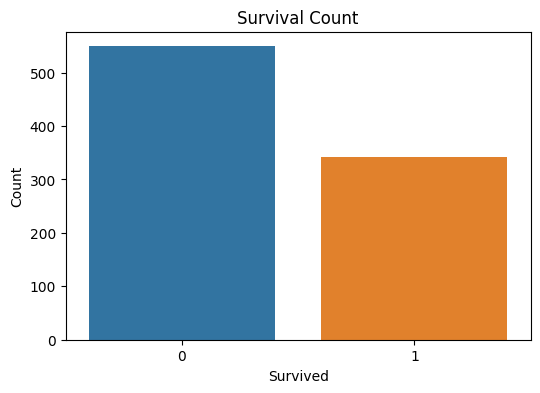

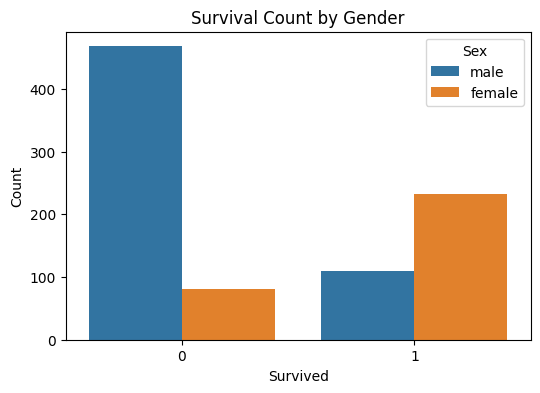

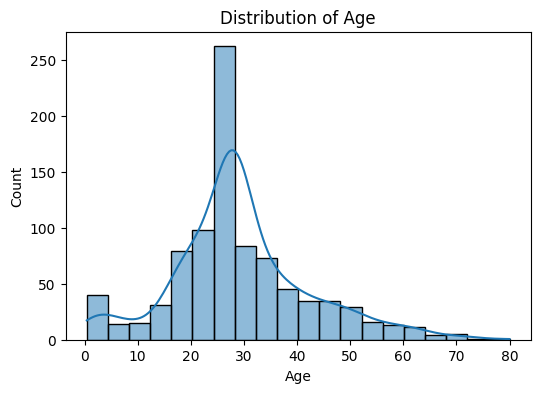

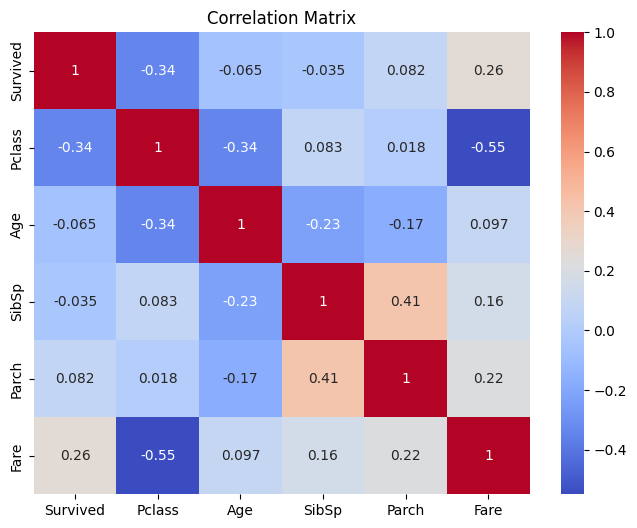

In [9]:
# Step 3: Analyze the features
# Plot the distribution of the 'Survived' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot the survival count by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


###########################################
#
#  Plot the survival count by passenger class
#  anything else to plot?
#
###########################################

# Plot the distribution of age
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_data, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

###########################################
#
#  anything else to plot?
#
###########################################

# Step 4: Analyze correlations between features
# Compute the correlation matrix
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = titanic_data[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

"A pipeline in machine learning refers to a sequence of data processing components or steps that are chained together to automate and streamline the machine learning workflow. It encompasses multiple stages, such as data preprocessing, feature extraction, model training, and evaluation, which are combined into a single entity. A pipeline enables the efficient and consistent execution of these steps, ensuring that data flows seamlessly from one stage to another. By encapsulating the entire workflow, pipelines simplify the development process, improve code readability, and facilitate the reproducibility of results. They also enable the application of machine learning models to new, unseen data by providing a unified structure to handle data transformation and model deployment. With pipelines, machine learning tasks become more manageable, organized, and conducive to experimentation and deployment."

In [17]:
# we filled in the missing values when we did our visualiztion but we had already split it. We have to do that again
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# drop="first" means that if have a category with labels "a","b","c", we get one hot columns only for b and c. 
# If we have a binary like sex. We don't want isMale and isFemale. We just want isMale
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
# Step 5: Select a classification algorithm and create a pipeline
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

In [13]:
# Step 6: Train the model
classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [14]:
# Step 7: Evaluate the model's performance on the testing set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [15]:
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8547486033519553


In [ ]:
# Step 8: Compare the performance of different models and hyperparameter settings
# You can repeat steps 5-7 with different classifiers and adjust their hyperparameters
# you can look at grid_search_code.ipynb if you want to grid search